# Welcome to Colab!

First 5 rows:
     Loan_ID  Gender Married Dependents     Education Self_Employed  \
0  LP001146  Female     Yes          0      Graduate            No   
1  LP001516  Female     Yes          2      Graduate            No   
2  LP001657    Male     Yes          0  Not Graduate            No   
3  LP002370    Male      No          0  Not Graduate            No   
4  LP001936    Male     Yes          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             2645             3440.0       120.0             360.0   
1            14866                0.0        70.0             360.0   
2             6033                0.0       160.0             360.0   
3             2717                0.0        60.0             180.0   
4             3075             2416.0       139.0             360.0   

   Credit_History Property_Area Loan_Status  CivilScore      TypeOfLoan  
0             0.0         Urban           N         734       H

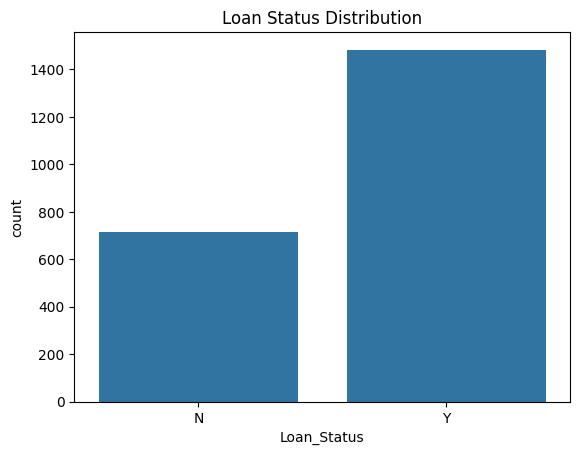

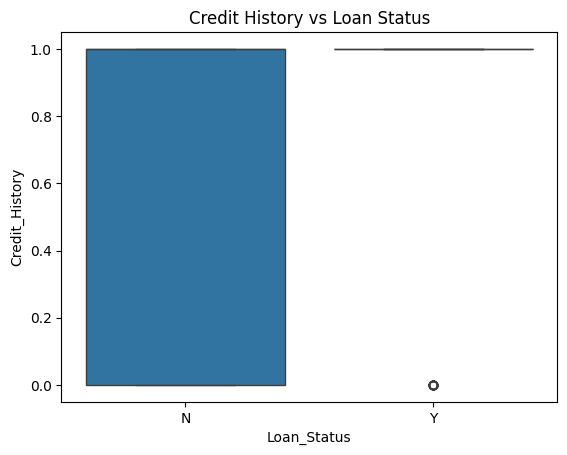

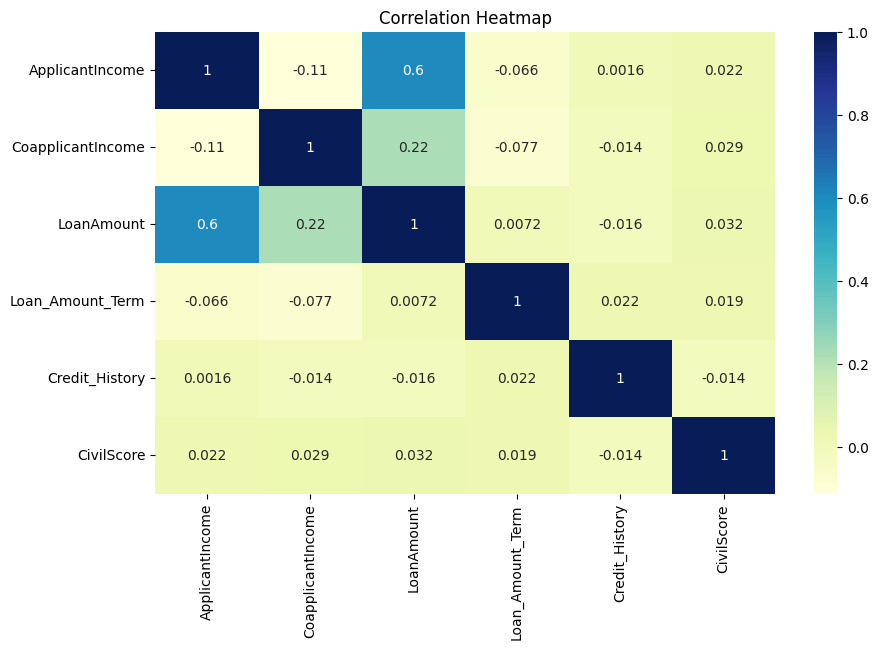


Selected Features: Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'CivilScore'],
      dtype='object')

Confusion Matrix:
 [[124  20]
 [  1 289]]

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       125
           1       1.00      0.94      0.96       309

    accuracy                           0.95       434
   macro avg       0.93      0.96      0.94       434
weighted avg       0.96      0.95      0.95       434



In [ ]:
# =====================================================
# LOAN APPROVAL MACHINE LEARNING PROJECT
# Complete Combined Code – Visualization → Preprocessing →
# Feature Selection → Model → Confusion Matrix
# =====================================================

# -------------------------------------------
# 1. IMPORT LIBRARIES
# -------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


# -------------------------------------------
# 2. LOAD DATA
# -------------------------------------------
df = pd.read_csv("/train_with_civilscore_loan_2200 (1).csv")
print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())


# -------------------------------------------
# 3. DATA VISUALIZATION
# -------------------------------------------

# Loan Status Count Plot
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.show()

# CIBIL Score vs Loan Status (Correct Column Name)
sns.boxplot(x='Loan_Status', y='Credit_History', data=df)
plt.title("Credit History vs Loan Status")
plt.show()


# Correlation Heatmap (ONLY numeric columns)
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()



# -------------------------------------------
# 4. PRE-PROCESSING
# -------------------------------------------

# Remove missing values
df = df.dropna()

# Label Encoding for categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


# -------------------------------------------
# 5. FEATURE SELECTION
# -------------------------------------------

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Select Top 5 features
selector = SelectKBest(chi2, k=5)
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", selected_features)

# Use only selected features
X = X[selected_features]


# -------------------------------------------
# 6. TRAIN–TEST SPLIT
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


# -------------------------------------------
# 7. MODEL TRAINING (Random Forest)
# -------------------------------------------
model = RandomForestClassifier()
model.fit(X_train, y_train)


# -------------------------------------------
# 8. PREDICTION & CONFUSION MATRIX
# -------------------------------------------
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_pred, y_test))